# IMPORT **LIBRARIES**

In [5]:
import pandas as pd
df = pd.read_csv("Cricket.csv", encoding= 'latin1') 

In [6]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [7]:
df.shape

(79, 13)

In [8]:
df_dub = df.copy()
# Checking for duplicates and dropping the entire duplicate row if any
df_dub.drop_duplicates(subset=None, inplace=True)

In [9]:
df_dub.shape

(79, 13)

we can see that in both original and duplicate data set having same values. So, we can conclude that there are no duplicates in the data set.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [11]:
df.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,74.211716,70.321022,14.421710,2551.873313,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,128.000000,127.000000,4.000000,5080.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000


# <h2>Create **Cluster** on bases of Average(Ave) and Strike rate(SR)

**Data** **Cleaning**

In [12]:
(df.isnull().sum() * 100 / len(df)).value_counts(ascending=False)

0.0    13
dtype: int64

In [13]:
df.isnull().sum().value_counts(ascending=False)

0    13
dtype: int64

In [14]:
(df.isnull().sum(axis=1) * 100 / len(df)).value_counts(ascending=False)

0.0    79
dtype: int64

In [15]:
df.isnull().sum(axis=1).value_counts(ascending=False)

0    79
dtype: int64

There are no missing / Null values either in columns or rows

Choose strike rate and average as the two factors on which you will cluster the data. You don’t need to clean the data. Just scale the data using the scale command and create the clusters.

In [27]:
col = ['Ave','SR']
X = df[col].astype(float)

In [18]:
X.head()

,Ave,SR
0,44.83,86.23
1,41.98,78.86
2,42.03,80.39
3,32.36,91.20
4,33.37,78.96


Standard scaling

In [19]:
from sklearn.preprocessing import StandardScaler
standard_scale = StandardScaler()
x = standard_scale.fit_transform(X)

In [20]:
x = pd.DataFrame(x)

In [21]:
x.columns = [col]

In [22]:
x.head()

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


Hopkins test if value near 1 then good dataseet to do clusterng on

In [23]:
import matplotlib.pyplot as plt
import numpy as np

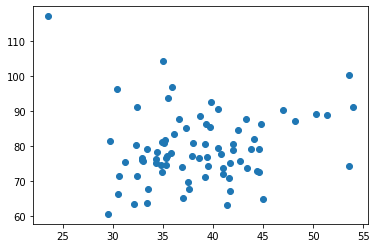

In [28]:
plt.scatter(x=df['Ave'],y=df['SR'])

In [29]:
from sklearn.cluster import KMeans

In [30]:
kmeans = KMeans(n_clusters = 10, max_iter = 50, random_state = 100)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [31]:
print(kmeans.cluster_centers_)

[[-1.06964673e-03  6.84900185e-01]
 [ 2.71054293e-01 -1.20043800e+00]
 [ 2.33642484e+00  1.31305051e+00]
 [-7.20005381e-01 -2.11395171e-01]
 [-2.54242330e+00  3.82311689e+00]
 [ 5.68809401e-01 -3.22599192e-01]
 [-1.15696791e+00 -1.31492533e+00]
 [-7.97293583e-01  1.74651986e+00]
 [ 2.56000683e+00 -5.20702290e-01]
 [ 1.09723085e+00  7.12108203e-01]]


In [32]:
print(kmeans.labels_)

[9 5 5 7 3 5 5 5 1 5 0 5 7 2 3 2 3 0 0 1 0 1 1 5 7 2 0 4 6 5 3 3 1 3 2 3 3
 0 8 5 3 3 9 6 3 6 9 6 3 5 7 5 1 3 3 6 5 0 3 0 3 7 5 9 9 9 3 1 5 3 0 6 3 6
 1 5 3 0 3]


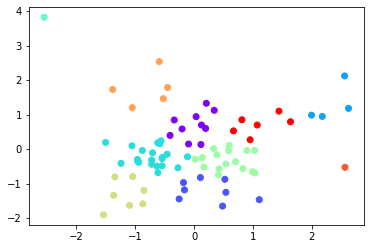

In [33]:
import matplotlib.pyplot as plt
plt.scatter(x.iloc[:,0],x.iloc[:,1], c=kmeans.labels_, cmap='rainbow')

In [37]:
#silhouette
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2,15):

    kmeans = KMeans(n_clusters = k,random_state=100).fit(x)
    sse_.append([k, silhouette_score(x, kmeans.labels_)])

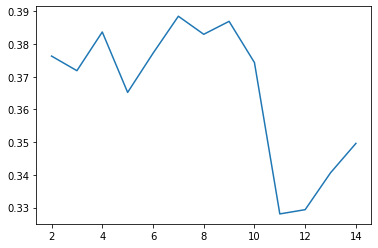

In [38]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

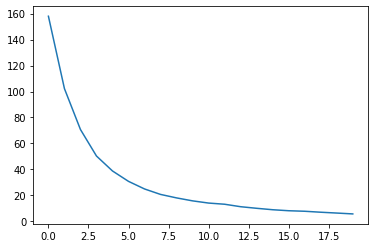

In [39]:
#sum of square
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter = 50, random_state = 100)
    model_clus.fit(x)
    ssd.append(model_clus.inertia_)
    
plt.plot(ssd)

In [40]:
#our final cluster can have 5 clusters

In [41]:
model_clus = KMeans(n_clusters = 5, max_iter = 50, random_state = 100)
model_clus.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

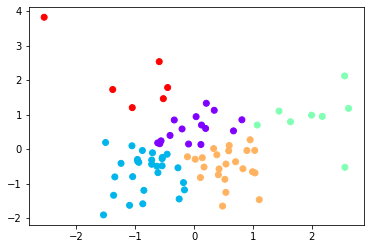

In [42]:
plt.scatter(x.iloc[:,0],x.iloc[:,1], c=model_clus.labels_, cmap='rainbow')